In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import Adam


In [2]:
img_rows=28
img_cols=28
channels=1
img_shape=(img_rows,img_cols,channels)
z_dim=100

In [3]:
def build_generator(img_shape,z_dim):
    model=Sequential()
    model.add(Dense(128,input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation="tanh"))#-1~1
    model.add(Reshape(img_shape))
    
    return model

In [4]:
def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))#0~1
    
    return model

In [5]:
def build_gan(generator,discriminator):
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [6]:
discriminator=build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])
generator=build_generator(img_shape,z_dim)
discriminator.trainable=False
gan=build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [7]:
losses=[]
accuracies=[]
iteration_checkpoints=[]

def train(iterations,batch_size,sample_interval):
    (x_train,_),(_,_)=mnist.load_data()
    x_train=x_train/127.5-1.0   #因為前面的tanh -1~1
    x_train=np.expand_dims(x_train,axis=3)
    
    real=np.ones((batch_size,1))
    fake=np.zeros((batch_size,1))
    
    for iteration in range(iterations):
    # Get a random batch of real images
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        
        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)
        
        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [8]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5
    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    

1000 [D loss: 0.037339, acc.: 99.61%] [G loss: 5.431595]
2000 [D loss: 0.213771, acc.: 92.19%] [G loss: 4.067741]
3000 [D loss: 0.072504, acc.: 98.05%] [G loss: 5.348989]
4000 [D loss: 0.111618, acc.: 95.70%] [G loss: 4.840926]
5000 [D loss: 0.135158, acc.: 94.92%] [G loss: 4.785416]
6000 [D loss: 0.337855, acc.: 86.33%] [G loss: 3.637815]
7000 [D loss: 0.159222, acc.: 93.36%] [G loss: 4.554129]
8000 [D loss: 0.285197, acc.: 89.45%] [G loss: 4.809275]
9000 [D loss: 0.353236, acc.: 87.50%] [G loss: 4.325835]
10000 [D loss: 0.219978, acc.: 89.06%] [G loss: 4.938490]
11000 [D loss: 0.453478, acc.: 81.64%] [G loss: 2.927241]
12000 [D loss: 0.239251, acc.: 90.62%] [G loss: 3.922570]
13000 [D loss: 0.483066, acc.: 82.81%] [G loss: 3.158311]
14000 [D loss: 0.332295, acc.: 85.55%] [G loss: 3.591026]
15000 [D loss: 0.336365, acc.: 87.50%] [G loss: 3.161688]
16000 [D loss: 0.200201, acc.: 91.41%] [G loss: 3.988926]
17000 [D loss: 0.299642, acc.: 85.94%] [G loss: 3.046992]
18000 [D loss: 0.268750

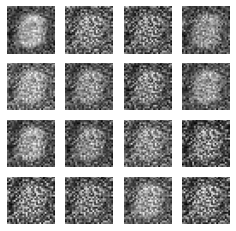

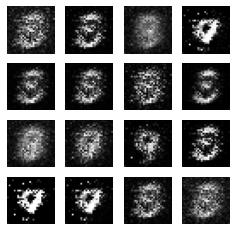

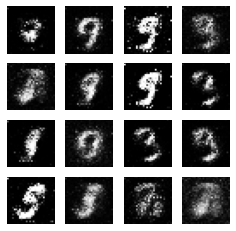

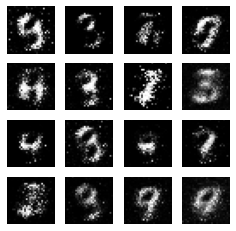

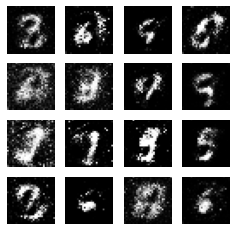

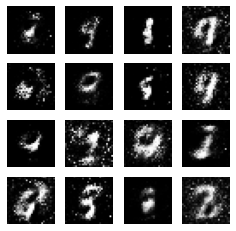

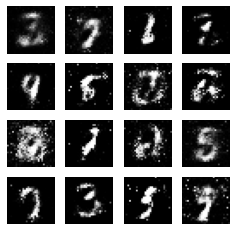

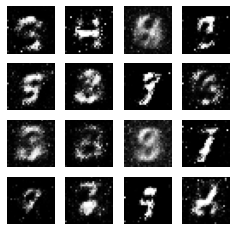

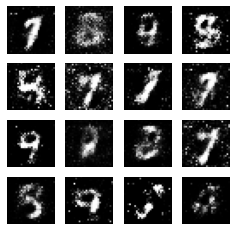

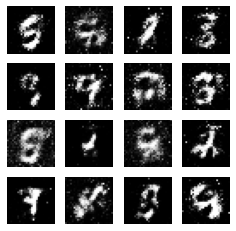

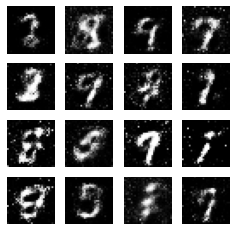

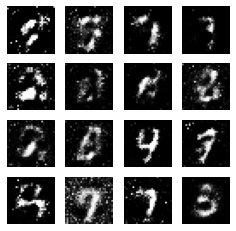

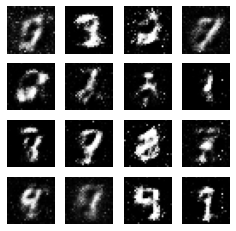

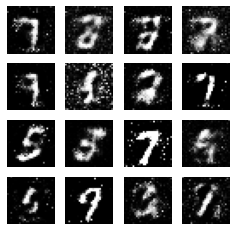

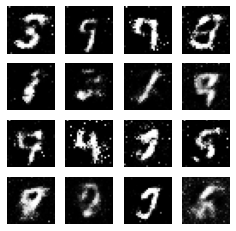

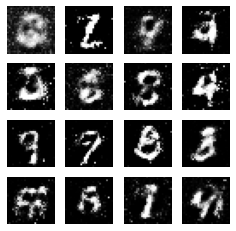

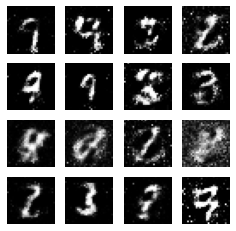

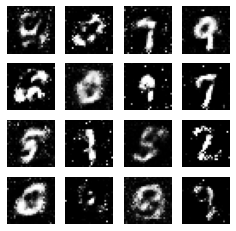

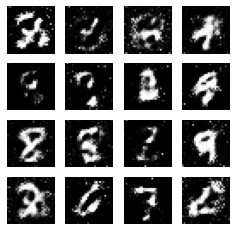

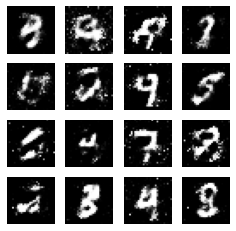

In [9]:
# Set hyperparameters
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import Adam

img_rows=28
img_cols=28
channels=1
img_shape=(img_rows,img_cols,channels)
z_dim=50


In [ ]:
def build_generator(img_shape,z_dim):
    model=Sequential()
    model.add(Dense(128,input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation="tanh"))#-1~1
    model.add(Reshape(img_shape))
    
    return model

def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))#0~1
    
    return model

def build_gan(generator,discriminator):
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator=build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator=build_generator(img_shape,z_dim)
discriminator.trainable=False
gan=build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [ ]:
losses=[]
accuracies=[]
iteration_checkpoints=[]

def train(iterations,batch_size,sample_interval):
    (x_train,_),(_,_)=mnist.load_data()
    x_train=x_train/127.5-1.0   #因為前面的tanh -1~1
    x_train=np.expand_dims(x_train,axis=3)
    
    real=np.ones((batch_size,1))
    fake=np.zeros((batch_size,1))
    
    for iteration in range(iterations):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        z = np.random.normal(0, 1, (batch_size, 50))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 50))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)
        
        if (iteration + 1) % sample_interval == 0:

            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)


1000 [D loss: 0.027460, acc.: 100.00%] [G loss: 5.157969]
2000 [D loss: 0.174125, acc.: 94.53%] [G loss: 5.253036]
3000 [D loss: 0.101967, acc.: 96.09%] [G loss: 7.163634]
4000 [D loss: 0.175059, acc.: 91.80%] [G loss: 4.743224]
5000 [D loss: 0.171901, acc.: 92.97%] [G loss: 4.604984]
6000 [D loss: 0.185608, acc.: 92.97%] [G loss: 5.015839]
7000 [D loss: 0.153237, acc.: 94.53%] [G loss: 5.704048]
8000 [D loss: 0.357049, acc.: 86.33%] [G loss: 4.514242]
9000 [D loss: 0.260110, acc.: 87.11%] [G loss: 3.970845]
10000 [D loss: 0.273372, acc.: 89.45%] [G loss: 4.399396]
11000 [D loss: 0.394346, acc.: 83.98%] [G loss: 2.808698]
12000 [D loss: 0.616923, acc.: 76.17%] [G loss: 2.945332]
13000 [D loss: 0.563490, acc.: 71.88%] [G loss: 3.286379]
14000 [D loss: 0.494641, acc.: 78.52%] [G loss: 3.079299]
15000 [D loss: 0.417057, acc.: 84.77%] [G loss: 3.015457]
16000 [D loss: 0.331242, acc.: 87.89%] [G loss: 3.362275]
17000 [D loss: 0.517403, acc.: 76.17%] [G loss: 2.765646]
18000 [D loss: 0.41570

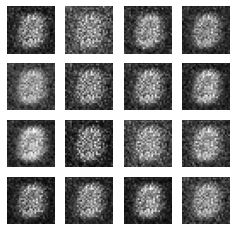

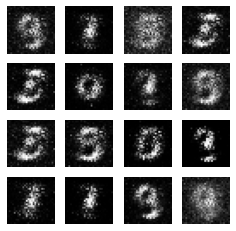

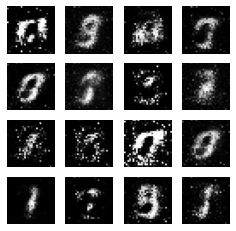

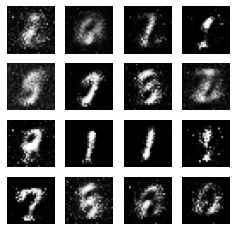

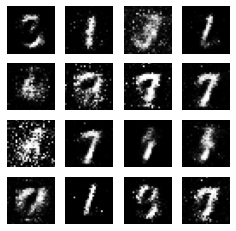

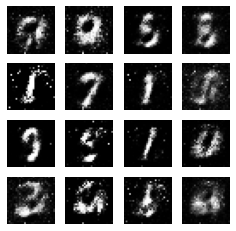

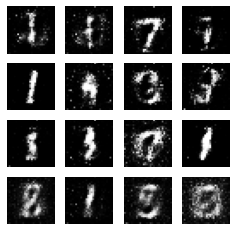

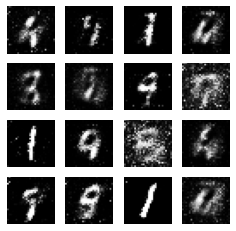

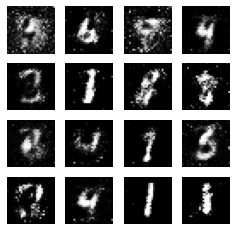

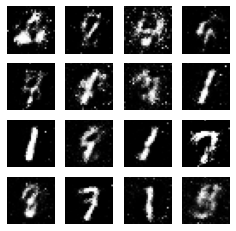

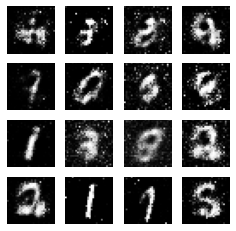

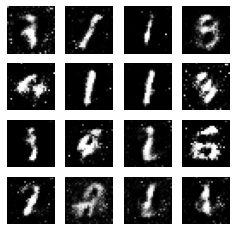

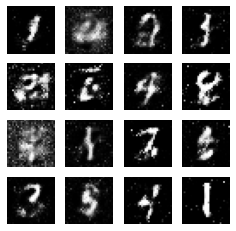

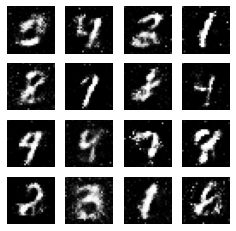

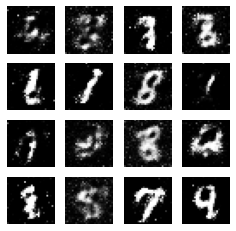

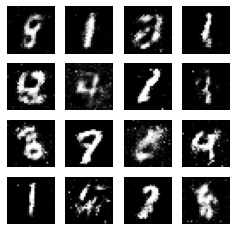

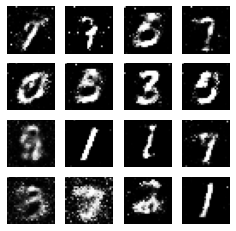

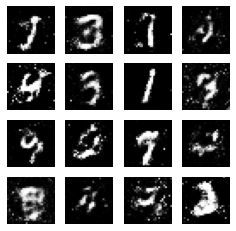

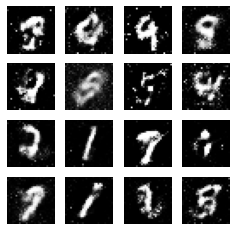

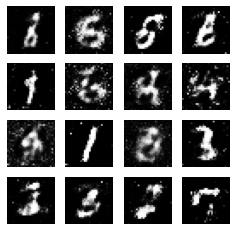

In [ ]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(image_grid_rows,image_grid_columns,figsize=(4, 4),
                  sharey=True,sharex=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import Adam

img_rows=28
img_cols=28
channels=1
img_shape=(img_rows,img_cols,channels)
z_dim=150

In [ ]:
def build_generator(img_shape,z_dim):
    model=Sequential()
    model.add(Dense(128,input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation="tanh"))#-1~1
    model.add(Reshape(img_shape))
    
    return model

def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))#0~1
    
    return model

def build_gan(generator,discriminator):
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator=build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator=build_generator(img_shape,z_dim)
discriminator.trainable=False
gan=build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [ ]:
losses=[]
accuracies=[]
iteration_checkpoints=[]

def train(iterations,batch_size,sample_interval):
    (x_train,_),(_,_)=mnist.load_data()
    x_train=x_train/127.5-1.0   #因為前面的tanh -1~1
    x_train=np.expand_dims(x_train,axis=3)
    
    real=np.ones((batch_size,1))
    fake=np.zeros((batch_size,1))
    
    for iteration in range(iterations):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)
        
        if (iteration + 1) % sample_interval == 0:

            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)


1000 [D loss: 0.078958, acc.: 97.66%] [G loss: 4.537355]
2000 [D loss: 0.124781, acc.: 95.31%] [G loss: 5.077124]
3000 [D loss: 0.174464, acc.: 93.75%] [G loss: 5.385444]
4000 [D loss: 0.244441, acc.: 86.33%] [G loss: 3.979951]
5000 [D loss: 0.294904, acc.: 89.06%] [G loss: 3.981612]
6000 [D loss: 0.553214, acc.: 78.12%] [G loss: 2.738229]
7000 [D loss: 0.632228, acc.: 70.31%] [G loss: 2.499838]
8000 [D loss: 0.289232, acc.: 87.89%] [G loss: 3.834198]
9000 [D loss: 0.379550, acc.: 83.20%] [G loss: 2.802319]
10000 [D loss: 0.364654, acc.: 80.86%] [G loss: 3.598357]
11000 [D loss: 0.281794, acc.: 88.67%] [G loss: 3.191365]
12000 [D loss: 0.357809, acc.: 83.98%] [G loss: 3.358696]
13000 [D loss: 0.359449, acc.: 83.59%] [G loss: 2.678261]
14000 [D loss: 0.310347, acc.: 84.77%] [G loss: 2.395296]
15000 [D loss: 0.304650, acc.: 86.72%] [G loss: 3.032298]
16000 [D loss: 0.432436, acc.: 81.64%] [G loss: 2.736208]
17000 [D loss: 0.464114, acc.: 76.95%] [G loss: 2.724687]
18000 [D loss: 0.435100

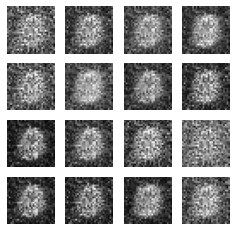

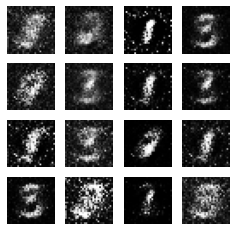

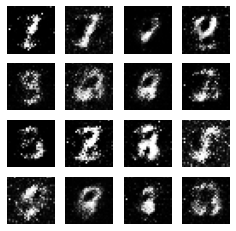

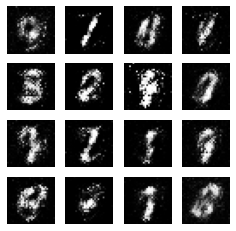

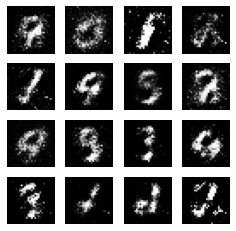

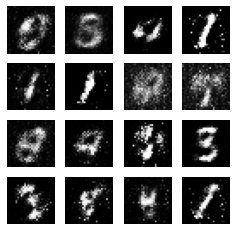

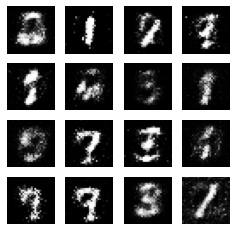

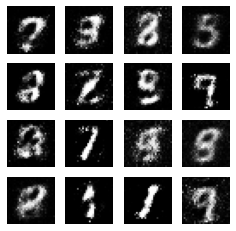

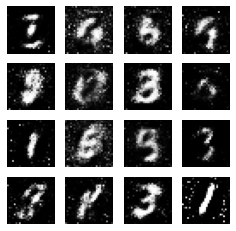

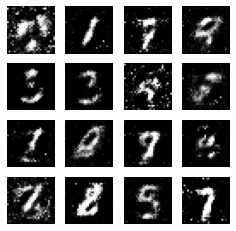

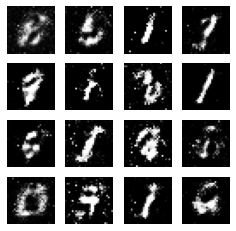

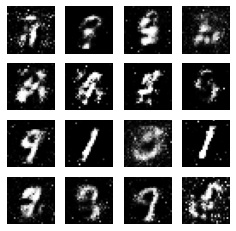

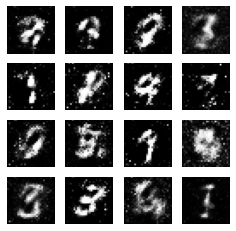

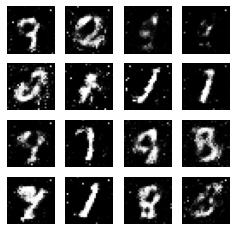

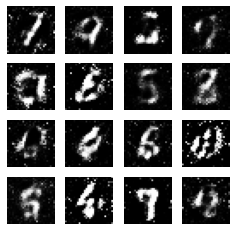

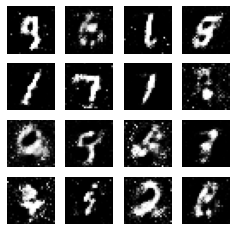

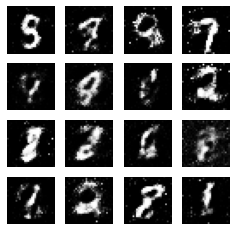

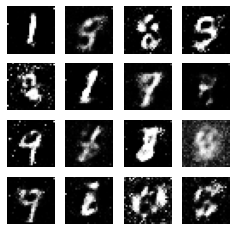

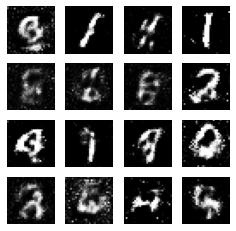

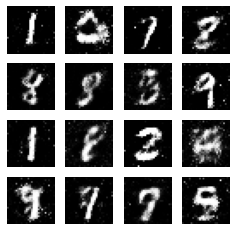

In [ ]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(image_grid_rows,image_grid_columns,figsize=(4, 4),
                  sharey=True,sharex=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import Adam

img_rows=28
img_cols=28
channels=1
img_shape=(img_rows,img_cols,channels)
z_dim=100

In [11]:
def build_generator(img_shape,z_dim):
    model=Sequential()
    model.add(Dense(64,input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation="tanh"))#-1~1
    model.add(Reshape(img_shape))
    
    return model

def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))#0~1
    
    return model

def build_gan(generator,discriminator):
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator=build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator=build_generator(img_shape,z_dim)
discriminator.trainable=False
gan=build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [12]:
losses=[]
accuracies=[]
iteration_checkpoints=[]

def train(iterations,batch_size,sample_interval):
    (x_train,_),(_,_)=mnist.load_data()
    x_train=x_train/127.5-1.0   #因為前面的tanh -1~1
    x_train=np.expand_dims(x_train,axis=3)
    
    real=np.ones((batch_size,1))
    fake=np.zeros((batch_size,1))
    
    for iteration in range(iterations):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)
        
        if (iteration + 1) % sample_interval == 0:

            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)


1000 [D loss: 0.015230, acc.: 100.00%] [G loss: 4.731733]
2000 [D loss: 0.222035, acc.: 89.84%] [G loss: 4.412127]
3000 [D loss: 0.090165, acc.: 96.88%] [G loss: 4.375809]
4000 [D loss: 0.156282, acc.: 94.14%] [G loss: 3.958998]
5000 [D loss: 0.141067, acc.: 96.09%] [G loss: 4.904449]
6000 [D loss: 0.179117, acc.: 92.97%] [G loss: 4.818299]
7000 [D loss: 0.178986, acc.: 92.97%] [G loss: 5.990437]
8000 [D loss: 0.228948, acc.: 92.19%] [G loss: 3.927688]
9000 [D loss: 0.240672, acc.: 90.62%] [G loss: 3.440541]
10000 [D loss: 0.457520, acc.: 82.03%] [G loss: 3.828638]
11000 [D loss: 0.661305, acc.: 71.88%] [G loss: 3.237167]
12000 [D loss: 0.293488, acc.: 86.72%] [G loss: 4.627456]
13000 [D loss: 0.230959, acc.: 89.84%] [G loss: 4.380002]
14000 [D loss: 0.286145, acc.: 86.33%] [G loss: 3.860212]
15000 [D loss: 0.445599, acc.: 80.86%] [G loss: 2.965596]
16000 [D loss: 0.355211, acc.: 84.38%] [G loss: 2.433810]
17000 [D loss: 0.287432, acc.: 89.45%] [G loss: 3.784318]
18000 [D loss: 0.39612

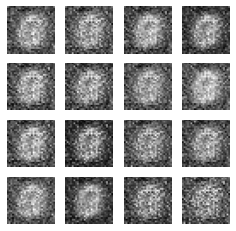

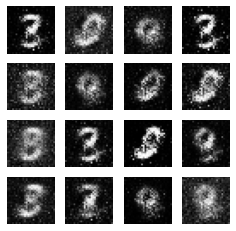

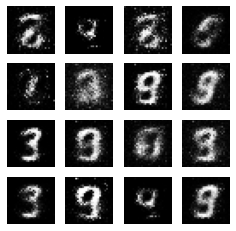

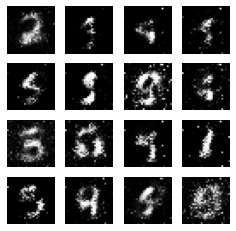

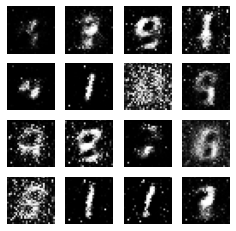

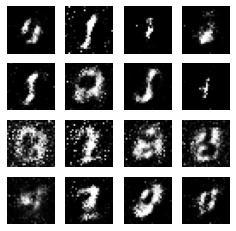

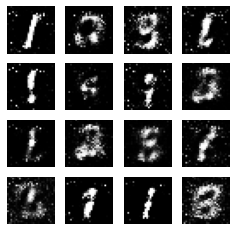

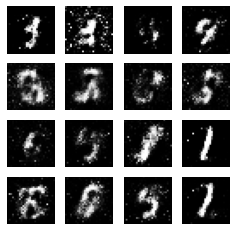

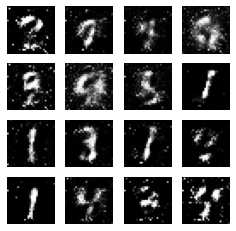

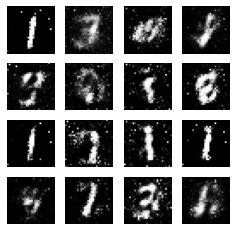

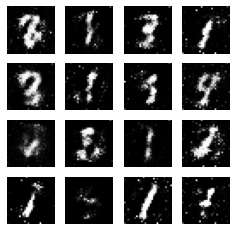

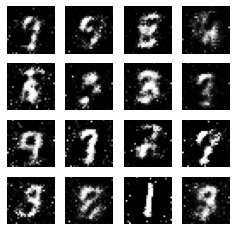

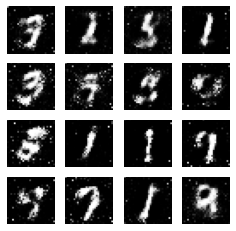

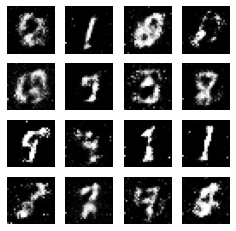

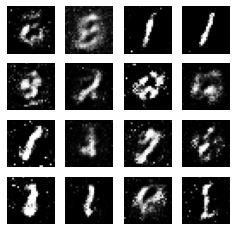

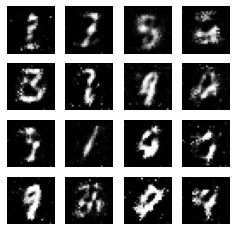

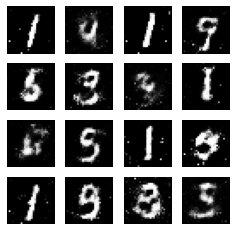

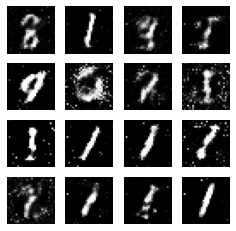

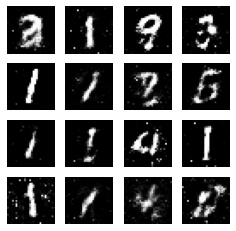

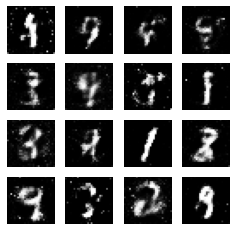

In [13]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(image_grid_rows,image_grid_columns,figsize=(4, 4),
                  sharey=True,sharex=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import Adam

img_rows=28
img_cols=28
channels=1
img_shape=(img_rows,img_cols,channels)
z_dim=100

In [2]:
def build_generator(img_shape,z_dim):
    model=Sequential()
    model.add(Dense(256,input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation="tanh"))#-1~1
    model.add(Reshape(img_shape))
    
    return model

def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))#0~1
    
    return model

def build_gan(generator,discriminator):
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator=build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator=build_generator(img_shape,z_dim)
discriminator.trainable=False
gan=build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [3]:
losses=[]
accuracies=[]
iteration_checkpoints=[]

def train(iterations,batch_size,sample_interval):
    (x_train,_),(_,_)=mnist.load_data()
    x_train=x_train/127.5-1.0   #因為前面的tanh -1~1
    x_train=np.expand_dims(x_train,axis=3)
    
    real=np.ones((batch_size,1))
    fake=np.zeros((batch_size,1))
    
    for iteration in range(iterations):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)
        
        if (iteration + 1) % sample_interval == 0:

            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)


11501568/11490434 [==============================] - 0s 0us/step
1000 [D loss: 0.075205, acc.: 98.44%] [G loss: 6.424229]
2000 [D loss: 0.121941, acc.: 95.70%] [G loss: 4.312945]
3000 [D loss: 0.046815, acc.: 98.83%] [G loss: 5.671993]
4000 [D loss: 0.195704, acc.: 93.36%] [G loss: 4.523898]
5000 [D loss: 0.437198, acc.: 81.25%] [G loss: 3.357334]
6000 [D loss: 0.379075, acc.: 84.38%] [G loss: 3.625015]
7000 [D loss: 0.385864, acc.: 82.42%] [G loss: 2.874171]
8000 [D loss: 0.386954, acc.: 84.77%] [G loss: 3.227692]
9000 [D loss: 0.334303, acc.: 84.38%] [G loss: 2.937845]
10000 [D loss: 0.521912, acc.: 78.12%] [G loss: 2.592083]
11000 [D loss: 0.238001, acc.: 89.06%] [G loss: 3.303884]
12000 [D loss: 0.297664, acc.: 89.45%] [G loss: 3.121768]
13000 [D loss: 0.447359, acc.: 80.47%] [G loss: 2.398625]
14000 [D loss: 0.291902, acc.: 89.06%] [G loss: 2.955547]
15000 [D loss: 0.414133, acc.: 80.86%] [G loss: 2.288815]
16000 [D loss: 0.406496, acc.: 83.59%] [G loss: 2.888505]
17000 [D loss: 0

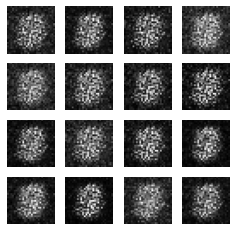

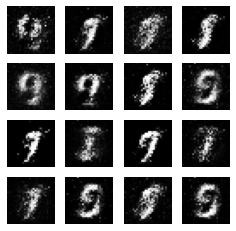

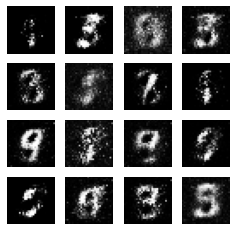

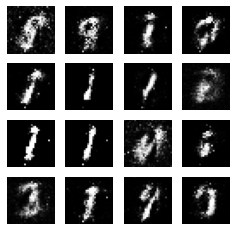

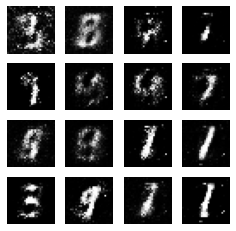

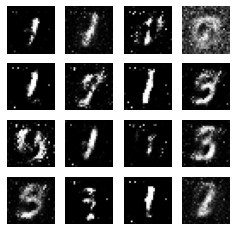

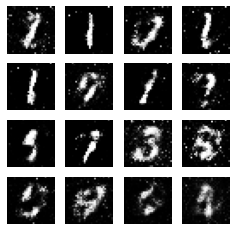

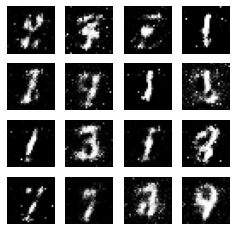

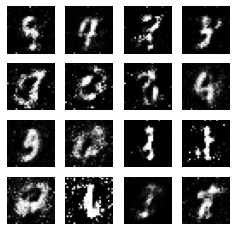

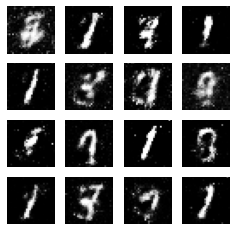

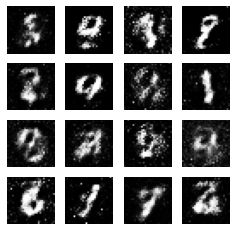

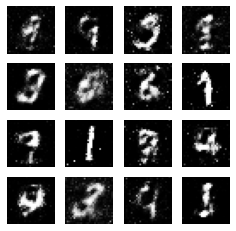

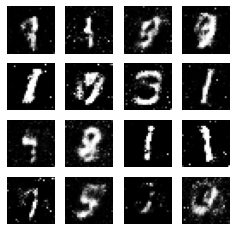

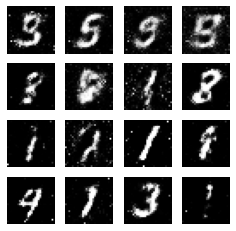

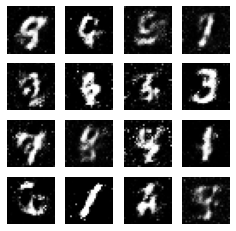

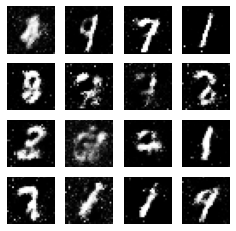

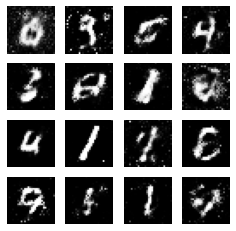

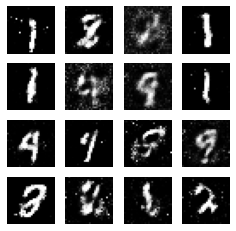

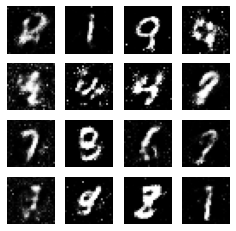

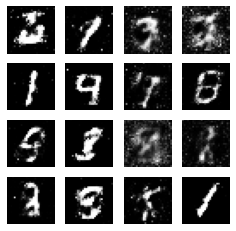

In [4]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(image_grid_rows,image_grid_columns,figsize=(4, 4),
                  sharey=True,sharex=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Dense,Flatten,Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import Adam

img_rows=28
img_cols=28
channels=1
img_shape=(img_rows,img_cols,channels)
z_dim=100

In [2]:
def build_generator(img_shape,z_dim):
    model=Sequential()
    model.add(Dense(128,input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation="tanh"))#-1~1
    model.add(Reshape(img_shape))
    
    return model

def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation="sigmoid"))#0~1
    
    return model

def build_gan(generator,discriminator):
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator=build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator=build_generator(img_shape,z_dim)
discriminator.trainable=False
gan=build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())

In [3]:
losses=[]
accuracies=[]
iteration_checkpoints=[]

def train(iterations,batch_size,sample_interval):
    (x_train,_),(_,_)=mnist.load_data()
    x_train=x_train/127.5-1.0   #因為前面的tanh -1~1
    x_train=np.expand_dims(x_train,axis=3)
    
    real=np.ones((batch_size,1))
    fake=np.zeros((batch_size,1))
    
    for iteration in range(iterations):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        imgs = x_train[idx]

        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 150))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)
        
        if (iteration + 1) % sample_interval == 0:

            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)


In [ ]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(image_grid_rows,image_grid_columns,figsize=(4, 4),
                  sharey=True,sharex=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 200000
batch_size = 128
sample_interval = 10000

train(iterations, batch_size, sample_interval)